# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:

# student details 1: Roei G. 5171
# student details 2: Daniel S. 1489
# student details 3: Rom Z. 0752
# student details 4: Alon A. 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: claude
Goal: find the 6 best attributes for a correlation map
Propmpt1: what are the best attributes for a correlation map in this dataset, dont show with code
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
This dataset describes the properties of different wines based on 13 attributes.
We want to be able to classify new wines into 1 of 3 classes.
We will use classification machine learning algorithms in order to help us achieve our goal.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns


In [8]:
def import_csv(path):
    return pd.read_csv(path)

In [11]:
train = import_csv("wine_train.csv")
train.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [12]:

test = import_csv("wine_test.csv")
test.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


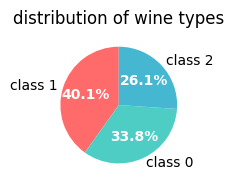

In [23]:
pieplot = plt.subplot(2, 3, 1)
wine_types = train['target'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
labels = [f'class {i}' for i in wine_types.index]
wedges, texts, autotexts = pieplot.pie(wine_types.values, labels=labels, colors=colors, 
                                      autopct='%1.1f%%', startangle=90)
pieplot.set_title('distribution of wine types')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

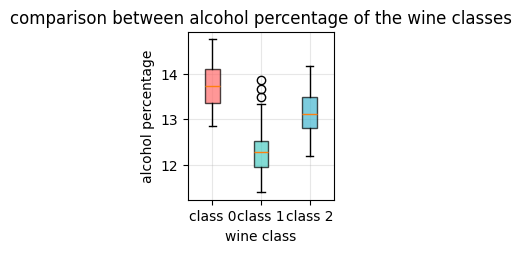

In [25]:
bxplot = plt.subplot(2, 3, 2)
wine_data_by_type = [train[train['target']==i]['alcohol'].values for i in sorted(train['target'].unique())]
bp = bxplot.boxplot(wine_data_by_type, tick_labels=[f'class {i}' for i in sorted(train['target'].unique())],
                  patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
bxplot.set_xlabel('wine class')
bxplot.set_ylabel('alcohol percentage')
bxplot.set_title('comparison between alcohol percentage of the wine classes')
bxplot.grid(True, alpha=0.3)

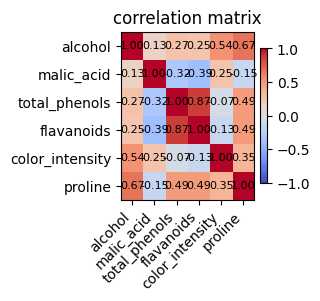

In [ ]:
cor_mat = plt.subplot(2, 3, 3)
selected_features = ['alcohol', 'malic_acid', 'total_phenols', 'flavanoids', 'color_intensity', 'proline']
corr_matrix = train[selected_features].corr()
im = cor_mat.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
cor_mat.set_xticks(range(len(selected_features)))
cor_mat.set_yticks(range(len(selected_features)))
cor_mat.set_xticklabels(selected_features, rotation=45, ha='right')
cor_mat.set_yticklabels(selected_features)
cor_mat.set_title('correlation matrix')
for i in range(len(selected_features)):
    for j in range(len(selected_features)):
        text = cor_mat.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8)
plt.colorbar(im, ax=cor_mat, fraction=0.046, pad=0.04)

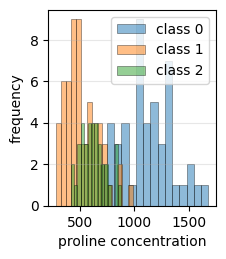

In [27]:
hist = plt.subplot(2, 3, 6)
for wine_type in sorted(train['target'].unique()):
    mask = train['target'] == wine_type
    hist.hist(train[mask]['proline'], bins=15, alpha=0.5, label=f'class {wine_type}', 
            edgecolor='black', linewidth=0.5)
hist.set_xlabel('proline concentration')
hist.set_ylabel('frequency')
hist.legend()
hist.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed


Random Forest:
----------------------------------------
  הפרמטרים הטובים ביותר: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
  Macro-Average F1 ממוצע ב-CV: 0.9792
  סטיית תקן: 0.0172

SVM:
----------------------------------------
  הפרמטרים הטובים ביותר: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
  Macro-Average F1 ממוצע ב-CV: 0.9856
  סטיית תקן: 0.0288

Logistic Regression:
----------------------------------------
  הפרמטרים הטובים ביותר: {'C': 0.1, 'solver': 'lbfgs'}
  Macro-Average F1 ממוצע ב-CV: 0.9795
  סטיית תקן: 0.0169

בחירת המודל הטוב ביותר

המודל הנבחר: SVM
Macro-Average F1 ב-Cross Validation: 0.9856

הערכת ביצועים על Test Set

*** Macro-Average F1 על Test Set: 1.0000 ***

Classification Report:
----------------------------------------
              precision    recall  f1-score   support

     Class 0     1.0000    1.0000    1.0000        11
     Class 1     1.0000    1.0000    1.0000        14
     Class 2     1.0000    1.0000    1.0000        11

   

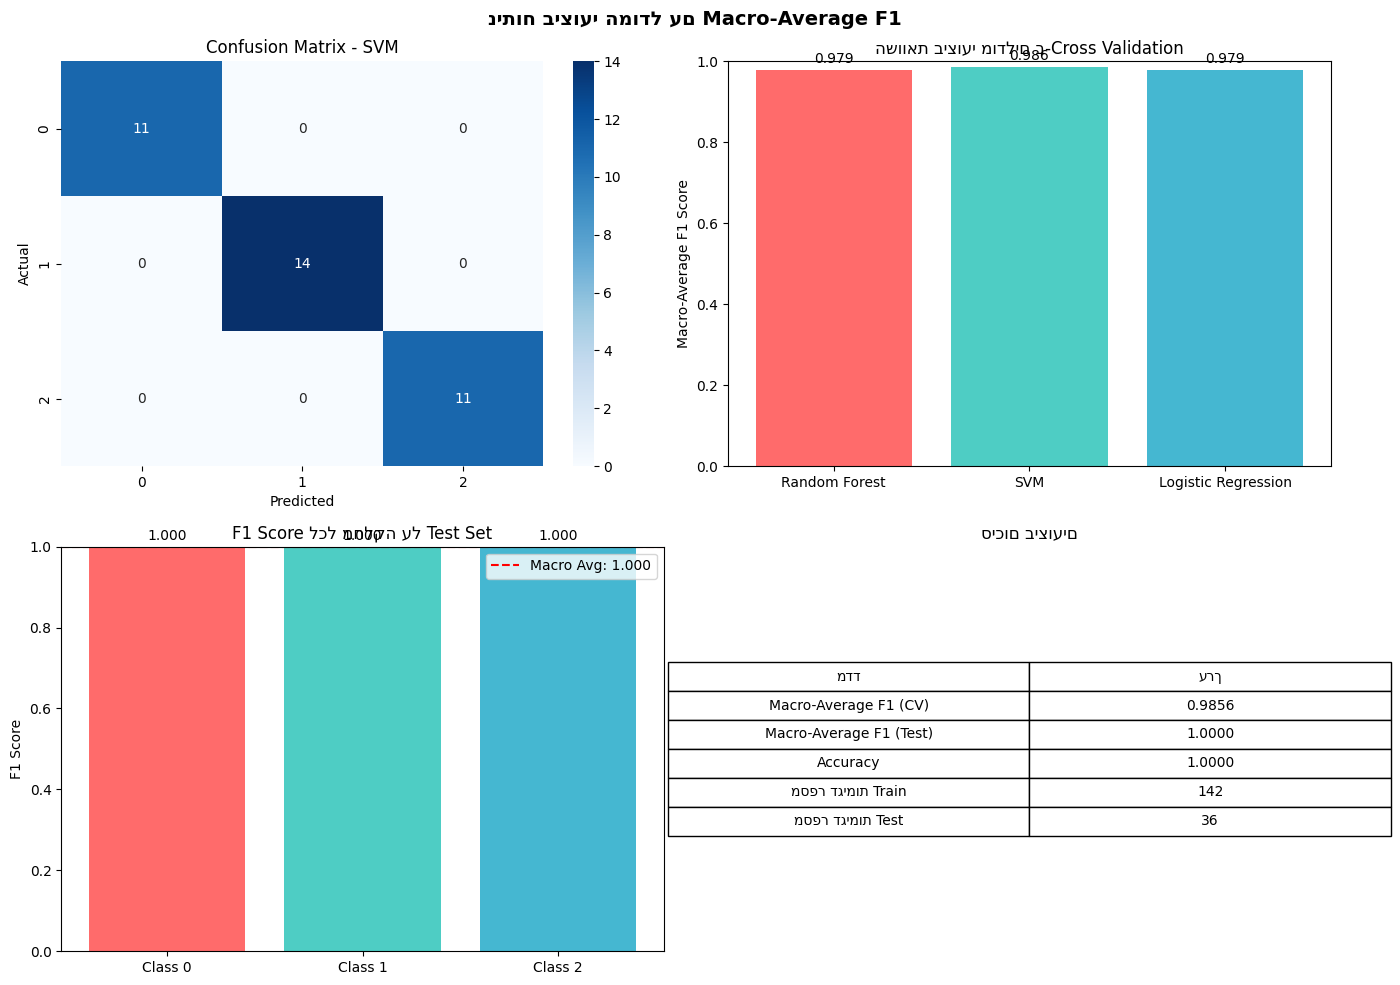

In [38]:
df = pd.concat([train, test], ignore_index=True)
X_train = train.drop("target", axis=1)
Y_train = train['target']
X_test = test.drop("target", axis=1)
Y_test = test['target']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def calculate_macro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# הגדרת פרמטרים לחיפוש
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }
}

# יצירת StratifiedKFold לשמירה על פרופורציות בכל fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
cv_results = {}

for model_name, model in models.items():
    print(f"\n{model_name}:")
    print("-" * 40)
    
    # Grid Search עם Macro-Average F1 כמדד
    grid_search = GridSearchCV(
        model,
        param_grids[model_name],
        cv=skf,
        scoring='f1_macro',  # המדד שלנו!
        n_jobs=-1,
        verbose=0
    )
    
    # אימון
    grid_search.fit(X_train_scaled, Y_train)
    
    # שמירת התוצאות
    best_models[model_name] = grid_search.best_estimator_
    cv_results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'cv_results': grid_search.cv_results_
    }
    
    # הדפסת תוצאות
    print(f"  הפרמטרים הטובים ביותר: {grid_search.best_params_}")
    print(f"  Macro-Average F1 ממוצע ב-CV: {grid_search.best_score_:.4f}")
    
    # הצגת ציוני F1 לכל fold
    mean_scores = grid_search.cv_results_['mean_test_score']
    std_scores = grid_search.cv_results_['std_test_score']
    best_idx = grid_search.best_index_
    print(f"  סטיית תקן: {std_scores[best_idx]:.4f}")

# ============================================
# 6. בחירת המודל הטוב ביותר
# ============================================

print("\n" + "="*60)
print("בחירת המודל הטוב ביותר")
print("="*60)

best_model_name = max(cv_results, key=lambda x: cv_results[x]['best_score'])
best_model = best_models[best_model_name]
best_cv_score = cv_results[best_model_name]['best_score']

print(f"\nהמודל הנבחר: {best_model_name}")
print(f"Macro-Average F1 ב-Cross Validation: {best_cv_score:.4f}")

# ============================================
# 7. הערכה על Test Set
# ============================================

print("\n" + "="*60)
print("הערכת ביצועים על Test Set")
print("="*60)

# חיזוי על Test Set
y_pred = best_model.predict(X_test_scaled)

# חישוב Macro-Average F1
test_macro_f1 = calculate_macro_f1(Y_test, y_pred)

print(f"\n*** Macro-Average F1 על Test Set: {test_macro_f1:.4f} ***")

# Classification Report מפורט
print("\nClassification Report:")
print("-" * 40)
report = classification_report(Y_test, y_pred, 
                              target_names=[f'Class {i}' for i in sorted(df['target'].unique())],
                              digits=4)
print(report)

# חישוב F1 לכל מחלקה בנפרד
f1_per_class = f1_score(Y_test, y_pred, average=None)
print("\nF1-Score לכל מחלקה:")
for i, score in enumerate(f1_per_class):
    print(f"  Class {i}: {score:.4f}")

print(f"\nממוצע F1 Scores: {np.mean(f1_per_class):.4f}")
print(f"Macro-Average F1 (וידוא): {test_macro_f1:.4f}")

# ============================================
# 8. ויזואליזציה של התוצאות
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('ניתוח ביצועי המודל עם Macro-Average F1', fontsize=14, fontweight='bold')

# 1. Confusion Matrix
ax1 = axes[0, 0]
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title(f'Confusion Matrix - {best_model_name}')

# 2. השוואת F1 Scores בין המודלים
ax2 = axes[0, 1]
model_names = list(cv_results.keys())
cv_scores = [cv_results[name]['best_score'] for name in model_names]
bars = ax2.bar(model_names, cv_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax2.set_ylabel('Macro-Average F1 Score')
ax2.set_title('השוואת ביצועי מודלים ב-Cross Validation')
ax2.set_ylim(0, 1)
for bar, score in zip(bars, cv_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

# 3. F1 Score לכל מחלקה
ax3 = axes[1, 0]
classes = [f'Class {i}' for i in range(len(f1_per_class))]
bars = ax3.bar(classes, f1_per_class, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax3.axhline(y=test_macro_f1, color='red', linestyle='--', label=f'Macro Avg: {test_macro_f1:.3f}')
ax3.set_ylabel('F1 Score')
ax3.set_title('F1 Score לכל מחלקה על Test Set')
ax3.set_ylim(0, 1)
ax3.legend()
for bar, score in zip(bars, f1_per_class):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

# 4. Feature Importance (אם זה Random Forest)
ax4 = axes[1, 1]
if best_model_name == 'Random Forest':
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1][:10]  # Top 10
    ax4.barh(range(10), importances[indices])
    ax4.set_yticks(range(10))
    ax4.set_yticklabels([X.columns[i] for i in indices])
    ax4.set_xlabel('Importance')
    ax4.set_title('Top 10 Feature Importances')
else:
    # טבלת סיכום במקום
    ax4.axis('off')
    summary_data = [
        ['מדד', 'ערך'],
        ['Macro-Average F1 (CV)', f'{best_cv_score:.4f}'],
        ['Macro-Average F1 (Test)', f'{test_macro_f1:.4f}'],
        ['Accuracy', f'{(Y_test == y_pred).mean():.4f}'],
        ['מספר דגימות Train', str(len(X_train))],
        ['מספר דגימות Test', str(len(X_test))]
    ]
    table = ax4.table(cellText=summary_data[1:], colLabels=summary_data[0],
                     cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    ax4.set_title('סיכום ביצועים')

plt.tight_layout()
plt.show()


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Part 5 - Apply on test and show model performance estimation